In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/Train_Data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [3]:
df2 = pd.read_csv('data/Traindata_classlabels.csv')
df2.head()

,price_range
0,1
1,2
2,2
3,2
4,1


#### Doing without any preprocessing

##### KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df,df2,random_state=5,shuffle=True,test_size=0.2)

In [6]:
modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2,25 ,1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=-1,scoring = 'accuracy')
clfKNN.fit(X_train, y_train.values.ravel())

pred = clfKNN.predict(X_test)
print(classification_report(y_test,pred))
clfKNN.best_params_

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.90      0.93      0.91        92
           2       0.90      0.90      0.90       101
           3       0.98      0.93      0.96       104

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 18,
 'weights': 'distance'}

##### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [13]:
modelLog = LogisticRegression()
log_parameters = {
    "C": np.logspace(-2, -1, 30),
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
clfLog = GridSearchCV(
    modelLog, log_parameters, cv=10, verbose=0, n_jobs=-1, scoring="f1_macro"
)
clfLog.fit(X_train, y_train)
predLog = clfLog.predict(X_test)
print(classification_report(y_test, predLog))
clfLog.best_params_

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.98      0.99      0.98        92
           2       0.98      0.98      0.98       101
           3       0.99      0.99      0.99       104

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



{'C': 0.02807216203941177, 'penalty': 'l2', 'solver': 'newton-cg'}

In [14]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
51,1760,0,1.4,1,5,0,63,0.8,127,8,19,1382,1383,2053,19,12,16,0,1,0
1327,948,0,2.3,0,14,0,22,0.1,173,5,20,257,1654,3499,11,7,19,1,1,1
1488,959,1,1.3,1,0,0,36,0.4,196,5,14,1313,1331,3073,19,1,8,1,1,1
1432,630,0,2.0,0,9,1,14,0.5,180,8,13,66,1448,1212,12,8,12,1,0,0
417,651,1,0.8,1,2,1,63,0.2,176,5,4,548,858,2244,14,9,19,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,1317,0,1.8,1,2,0,43,0.5,113,5,3,179,613,3436,16,13,5,0,1,1
275,1220,0,2.9,0,3,0,62,0.5,125,4,8,403,1933,2589,19,11,15,1,1,1
1114,781,1,1.3,1,1,0,64,0.2,88,2,7,368,607,3862,17,10,9,0,0,0
1751,508,1,1.3,0,1,0,50,0.7,82,5,9,102,1195,2175,14,4,14,0,0,1


In [15]:
modelLog2 = LogisticRegression()
log_parameters = {
    "C": np.logspace(-2, -1, 30),
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
clfLog2 = GridSearchCV(
    modelLog2, log_parameters, cv=10, verbose=0, n_jobs=-1, scoring="accuracy"
)
clfLog2.fit(X_train, y_train)
predLog2 = clfLog2.predict(X_test)
print(classification_report(y_test, predLog2))
clfLog2.best_params_

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.99      0.99      0.99        92
           2       0.98      0.99      0.99       101
           3       0.99      0.99      0.99       104

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



{'C': 0.010826367338740546, 'penalty': 'l2', 'solver': 'newton-cg'}

In [114]:
modelLog3 = LogisticRegression(class_weight='balanced')
log_parameters = {
    "C": np.logspace(-2, -1.5, 30),
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
clfLog3 = GridSearchCV(
    modelLog3, log_parameters, cv=10, verbose=0, n_jobs=-1, scoring="accuracy"
)
clfLog3.fit(X_train, y_train)
predLog3 = clfLog3.predict(X_test)
print(classification_report(y_test, predLog3))
clfLog3.best_params_

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.99      0.99      0.99        92
           2       0.98      0.99      0.99       101
           3       0.99      0.99      0.99       104

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



{'C': 0.017433288221999882, 'penalty': 'l2', 'solver': 'newton-cg'}

#### Dtree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
modelDtree = DecisionTreeClassifier()
Dtree_parameters = {
    'criterion' : ["gini", "entropy"], 
    'max_features':['sqrt', 'log2',None],
#             'max_depth':np.linspace(140,190,10),
            'ccp_alpha':np.logspace(-3,-2,20),#np.logspace(-2.32,-2.3,20),
    "max_leaf_nodes" : [None]+np.arange(30,40,5).tolist(),
    
    "splitter" : ["best", "random"],
    "min_samples_split":np.arange(2,50,10)
    
}
clfDtree = GridSearchCV(
    modelDtree, Dtree_parameters, cv=10, verbose=0, n_jobs=-1, scoring="accuracy"
)
clfDtree.fit(X_train, y_train)
predDtree = clfDtree.predict(X_test)
print(classification_report(y_test, predDtree))
clfDtree.best_params_

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       103
           1       0.82      0.78      0.80        92
           2       0.81      0.86      0.84       101
           3       0.94      0.90      0.92       104

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



{'ccp_alpha': 0.004832930238571752,
 'criterion': 'entropy',
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_split': 12,
 'splitter': 'best'}

In [34]:
87

87

In [89]:
np.logspace(-2.32,-2.31,20)

array([0.0047863 , 0.0047921 , 0.00479792, 0.00480373, 0.00480956,
       0.00481539, 0.00482123, 0.00482708, 0.00483293, 0.00483879,
       0.00484466, 0.00485053, 0.00485641, 0.0048623 , 0.0048682 ,
       0.0048741 , 0.00488001, 0.00488593, 0.00489186, 0.00489779])

In [105]:
np.logspace(-3,-2,20)

array([0.001     , 0.00112884, 0.00127427, 0.00143845, 0.00162378,
       0.00183298, 0.00206914, 0.00233572, 0.00263665, 0.00297635,
       0.00335982, 0.00379269, 0.00428133, 0.00483293, 0.00545559,
       0.00615848, 0.00695193, 0.0078476 , 0.00885867, 0.01      ])

#### svm 

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn import pipeline

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=100000, tol=1e-4))
clf.fit(X_train, y_train)
pipe_line = pipeline.Pipeline(steps=[('standardscaler', StandardScaler()),
                ('classifier', SGDClassifier())])
clf_parameters = {
    'classifier__loss' :['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron'],
            'classifier__penalty' : ['l2', 'l1', 'elasticnet'], 
    'classifier__alpha' : np.logspace(-4,-2,30),
    'classifier__learning_rate' :[ 'constant','optimal','invscaling','adaptive']
    
#             'clf__n_estimators':(30,50,100),
#             'clf__max_depth':(10,20,30,50,100,200),
            } 
# print(clf.predict([[-0.8, -1]]))
# modelDtree = SGDClassifier()
# Dtree_parameters = {
# #     'criterion' : ["gini", "entropy"], 
# #     'max_features':['auto', 'sqrt', 'log2'],
# #             'max_depth':np.linspace(140,190,10),
#             'ccp_alpha':np.logspace(-3,-2,20),#np.logspace(-2.32,-2.3,20),
# #     "max_leaf_nodes" : np.arange(30,40,1),
    
# #     "splitter" : ["best", "random"],
#     "min_samples_split":np.arange(2,10,1)
    
# }
# clfDtree = GridSearchCV(
#     modelDtree, Dtree_parameters, cv=10, verbose=0, n_jobs=-1, scoring="accuracy"
# )
# clfDtree.fit(X_train, y_train)
grid = GridSearchCV(pipe_line,clf_parameters,scoring='f1_macro',cv=10,n_jobs=-1)          
grid.fit(X_train,y_train)     
clf= grid.best_estimator_ 
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
grid.best_params_

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       103
           1       0.69      0.71      0.70        92
           2       0.73      0.70      0.72       101
           3       0.97      0.99      0.98       104

    accuracy                           0.85       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.85      0.85      0.85       400



{'classifier__alpha': 0.004520353656360241,
 'classifier__learning_rate': 'optimal',
 'classifier__loss': 'log',
 'classifier__penalty': 'l1'}

In [140]:
rf = Pipeline(steps=[('preprocessor', StandardScaler()),
                      ('classifier', RandomForestClassifier())])
param_grid = { 
#     'classifier__n_estimators': [200, 500],
#     'classifier__max_features': ['auto', 'sqrt', 'log2'],
#     'classifier__max_depth' : [4,5,6,7,8],
#     'classifier__criterion' :['gini', 'entropy']
}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(rf, param_grid, n_jobs= 1)

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
# numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = train.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns
# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

In [144]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [282]:
import sklearn

In [302]:
# data = pd.Dataframe()
# data
{
    'raw':{'accuracy':,'f1':,'f1m'},
    'other':{}
}
data['other']['accuracy'].append()
data['other']['f1'].append()

In [341]:
data = {}
# data['Model'] = []
# data['Accuracy'] = []
# data['f1_micro'] =[]
# data['f1_macro'] =[]

In [370]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
def Classification(X_train, X_test, y_train, y_test,data,name:str,Gridsearch = False):
    try:
        y_train = y_train.values.ravel()
        y_test = y_test.values.ravel()
    except:
        pass
    i=1
    classifiers = [
    KNeighborsClassifier(),
    LogisticRegression()
    ]
    if Gridsearch ==True:
        clf_parameters = [
            {
                "clf__n_neighbors": np.arange(2,25 ,1),
                "clf__metric": ["cityblock","cosine","euclidean","l1","l2","manhattan","nan_euclidean",],
                "clf__weights": ["uniform", "distance"],
                "clf__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
         },
        {
                "clf__C": np.logspace(-2, -1.5, 30),
                "clf__penalty": ["l1", "l2", "elasticnet", "none"],
                "clf__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
        }
         ]
    else:
        clf_parameters = [{},{}]
    data[name] = {'Model':[],'Accuracy' :[],'f1_micro' :[],'f1_macro' :[]}
    dataint = {'Model':[],'Accuracy' :[],'f1_micro' :[],'f1_macro' :[]}
    for classifier,clf_params in zip(classifiers,clf_parameters):
    #     pipe = Pipeline(steps=[('preprocessor', preprocessor),
    #                       ('classifier', classifier)])
        pipe = Pipeline(steps=[('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=10,n_jobs=-1)  
        try:
            grid.fit(X_train, y_train)   
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
            i1 = classifier.__class__.__name__
            i2 = sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            dataint['Model'].append(i1)
            dataint['Accuracy'].append(i2)
            dataint['f1_micro'].append(i3)
            dataint['f1_macro'].append(i4)
            print("-"*80)
            print("-"*80)
            i+=1
        except Exception as e: print(e)
    classifiers = [
        DecisionTreeClassifier(),    
        SVC(),#(kernel="rbf", C=0.025, 
        NuSVC(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        SGDClassifier()
        ]
    base_estimators = classifiers
    if Gridsearch==True:
        clf_parameters = [
                          {
                'clf__criterion' : ["gini", "entropy"], 
            'clf__max_features':['sqrt', 'log2',None],
        #             'max_depth':np.linspace(140,190,10),
                    'clf__ccp_alpha':np.logspace(-3,-2,20),#np.logspace(-2.32,-2.3,20),
            "clf__max_leaf_nodes" : [None]+np.arange(30,40,5).tolist(),

            "clf__splitter" : ["best", "random"],
            "clf__min_samples_split":np.arange(2,50,10)
        },


            {
                    'clf__C':(0.8,2,30),
                    'clf__kernel':('linear','rbf','poly','sigmoid'),
                    'clf__decision_function_shape' : ['ovo', 'ovr'],
                    'clf__degree':np.arange(3,5,1)
                    },
            {
                'clf__nu': np.logspace(-1.15,-1.23,5),#np.logspace(-2,-1,30)
             'clf__kernel' : ['linear', 'poly', 'rbf', 'sigmoid' ]   ,
                'clf__gamma' : ['scale', 'auto'],
                'clf__degree':np.arange(3,5,1),
                'clf__decision_function_shape' : ['ovo', 'ovr'],
            },
            {
                 'clf__n_estimators': [150,200,250],
            'clf__max_features': ['sqrt', 'log2',None],
            'clf__max_depth' : [None],#np.arange(4,15,2).tolist(),
            'clf__criterion' :['gini', 'entropy']   ,
                'clf__bootstrap' :[True],
        #         'clf__ccp_alpha':np.logspace(-2,1,10)
            },
            {
                'clf__base_estimator':[RandomForestClassifier(),DecisionTreeClassifier(criterion='entropy'),SVC(),LogisticRegression(**{'C': 0.017433288221999882, 'penalty': 'l2', 'solver': 'newton-cg'})],
                'clf__algorithm' : ['SAMME', 'SAMME.R'],
                'clf__n_estimators': [50,100]
            },
            {
              'clf__loss' :['deviance', 'exponential'],
                'clf__criterion' : ['friedman_mse', 'squared_error'],
                'clf__max_features' : [ 'sqrt', 'log2'],
                'clf__learning_rate': np.logspace(-1,1,5),
                'clf__n_estimators':np.arange(100,1000,200)

            },
            {
                'clf__loss' :['hinge', 'log', 'modified_huber','squared_hinge', 'perceptron'],
                'clf__penalty' : ['l2', 'l1', 'elasticnet'], 
                'clf__alpha' : np.logspace(-4,-2,30),
                'clf__learning_rate' :[ 'constant','optimal','invscaling','adaptive'],
            }
            ]
    else:
        clf_parameters = [{}]*len(classifiers)
    for classifier,clf_params in zip(classifiers,clf_parameters):
    #     pipe = Pipeline(steps=[('preprocessor', preprocessor),
    #                       ('classifier', classifier)])
        pipe = Pipeline(steps=[('standardscaler', StandardScaler()),('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=10,n_jobs=-1)  
        try:
            grid.fit(X_train, y_train)   
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
#             data['Raw'].append ([data['Model'].append(classifier.__class__.__name__),
#             data['Accuracy'].append(sklearn.metrics.accuracy_score(y_test,pred)),
#             data['f1_micro'].append(sklearn.metrics.f1_score(y_test,pred,average='micro')),
#             data['f1_macro'].append(sklearn.metrics.f1_score(y_test,pred,average='macro'))])
            i1 = classifier.__class__.__name__
            i2 =sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            data['Model'].append(i1)
            data['Accuracy'].append(i2)
            data['f1_micro'].append(i3)
            data['f1_macro'].append(i4)
            print("-"*80)
            print("-"*80)
            i+=1
        except Exception as e: print(e)
    
    
    classifiers = [
    GaussianNB(),
    MultinomialNB()
    ]
    if Gridsearch==True:
        clf_parameters = [
            {
            'clf__var_smoothing':np.logspace(-20,-10,10)
            },
            {
                'clf__alpha':[0] + np.logspace(-2,5,5).tolist(),
                'clf__fit_prior':[True,False]
            }
             ]
    else:
        clf_parameters = [{}]*len(classifiers)

    for classifier,clf_params in zip(classifiers,clf_parameters):
    #     pipe = Pipeline(steps=[('preprocessor', preprocessor),
    #                       ('classifier', classifier)])
        pipe = Pipeline(steps=[('minmaxscalar',MinMaxScaler()),('clf', classifier)])
        grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=10,n_jobs=-1)  
        try:
            grid.fit(X_train, y_train)   
            pred = grid.predict(X_test)
            print("_"*32)
            print(f'{i}.',classifier)
            print("_"*32)
            print(grid.best_params_)
            print(classification_report(y_test, pred))
#             data['Raw'].append ([data['Model'].append(classifier.__class__.__name__),
#             data['Accuracy'].append(sklearn.metrics.accuracy_score(y_test,pred)),
#             data['f1_micro'].append(sklearn.metrics.f1_score(y_test,pred,average='micro')),
#             data['f1_macro'].append(sklearn.metrics.f1_score(y_test,pred,average='macro'))])
            i1 = classifier.__class__.__name__
            i2 = sklearn.metrics.accuracy_score(y_test,pred)
            i3 = sklearn.metrics.f1_score(y_test,pred,average='micro')
            i4 = sklearn.metrics.f1_score(y_test,pred,average='macro')
            dataint['Model'].append(i1)
            dataint['Accuracy'].append(i2)
            dataint['f1_micro'].append(i3)
            dataint['f1_macro'].append(i4)
            print("-"*80)
    
            i=i+1
        except Exception as e: print(e)
            #   print("model score: %.3f" % pipe.score(X_test, y_test))
    data[name] = dataint
    print(dataint)
X_train, X_test, y_train, y_test = train_test_split(df,df2,random_state=5,shuffle=True,test_size=0.2)
Classification(X_train, X_test, y_train, y_test,data,'Raw',Gridsearch=False)

________________________________
1. KNeighborsClassifier()
________________________________
{'clf__algorithm': 'auto', 'clf__metric': 'cityblock', 'clf__n_neighbors': 18, 'clf__weights': 'distance'}
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.90      0.93      0.91        92
           2       0.90      0.90      0.90       101
           3       0.98      0.93      0.96       104

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{'clf__C': 0.02807216203941177, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}
              precision    recal

exception calling callback for <Future at 0x288bd1b0520 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_asy

KeyboardInterrupt: 

exception calling callback for <Future at 0x288beb1da30 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\KHADGA JYOTH ALLI\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_asy

In [365]:
[{}]*7

[{}, {}, {}, {}, {}, {}, {}]

In [343]:
pd.DataFrame(data)
# data

,Raw
Accuracy,"[0.9225, 0.6675, 0.8175, 0.5825]"
Model,"[KNeighborsClassifier, LogisticRegression, Gau..."
f1_macro,"[0.9217101738944875, 0.6627662667345954, 0.813..."
f1_micro,"[0.9225, 0.6675, 0.8175, 0.5825]"


In [167]:
classifiers = [
    GaussianNB(),
    MultinomialNB()
    ]
clf_parameters = [{'clf__var_smoothing':np.logspace(-20,-10,10)},
    {'clf__alpha':[0] + np.logspace(-2,5,5).tolist(),
    'clf__fit_prior':[True,False]}
 ]

for classifier,clf_params in zip(classifiers,clf_parameters):
#     pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', classifier)])
    pipe = Pipeline(steps=[('minmaxscalar',MinMaxScaler()),('clf', classifier)])
    grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=10,n_jobs=-1)  
    try:
        grid.fit(X_train, y_train)   
        pred = grid.predict(X_test)
        print("_"*32)
        print(classifier)
        print("_"*32)
        print(grid.best_params_)
        print(classification_report(y_test, pred))
        print("-"*80)
        print("-"*80)
    except Exception as e: print(e)

________________________________
GaussianNB()
________________________________
{'clf__var_smoothing': 1e-20}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       103
           1       0.71      0.71      0.71        92
           2       0.68      0.67      0.68       101
           3       0.91      0.90      0.91       104

    accuracy                           0.82       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
MultinomialNB()
________________________________
{'clf__alpha': 0, 'clf__fit_prior': False}
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       103
           1       0.49      0.50      0.49        92
      

In [168]:
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression()
    ]
clf_parameters = [{"clf__n_neighbors": np.arange(2,25 ,1),
    "clf__metric": ["cityblock","cosine","euclidean","l1","l2","manhattan","nan_euclidean",],
    "clf__weights": ["uniform", "distance"],
    "clf__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
},
                  {
    "clf__C": np.logspace(-2, -1.5, 30),
    "clf__penalty": ["l1", "l2", "elasticnet", "none"],
    "clf__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
 ]

for classifier,clf_params in zip(classifiers,clf_parameters):
#     pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('classifier', classifier)])
    pipe = Pipeline(steps=[('clf', classifier)])
    grid = GridSearchCV(pipe,clf_params,scoring='f1_macro',cv=10,n_jobs=-1)  
    try:
        grid.fit(X_train, y_train)   
        pred = grid.predict(X_test)
        print("_"*32)
        print(classifier)
        print("_"*32)
        print(grid.best_params_)
        print(classification_report(y_test, pred))
        print("-"*80)
        print("-"*80)
    except Exception as e: print(e)

________________________________
KNeighborsClassifier()
________________________________
{'clf__algorithm': 'auto', 'clf__metric': 'cityblock', 'clf__n_neighbors': 18, 'clf__weights': 'distance'}
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.90      0.93      0.91        92
           2       0.90      0.90      0.90       101
           3       0.98      0.93      0.96       104

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
LogisticRegression()
________________________________
{'clf__C': 0.02807216203941177, 'clf__penalty': 'l2', 'clf__solver': 'newton-cg'}
              precision    recall  f1-

With feature selection

In [344]:
# Classification(X_trainc, X_testc, y_trainc, y_testc)

## Before PCA

Raw -> FE -> Corr -> Vif , PCA , ref , selectK

In [253]:
# df4.drop('four_g',axis = 1,inplace=True)
df4 = df.copy()
df4['sc_diag'] = np.sqrt(df['sc_h']**2 + df['sc_w']**2)
df4['sc_area'] = df['sc_h'] * df['sc_w']
df4['px_diag'] = np.sqrt(df['px_height']**2 + df['px_width']**2)
df4['px_area'] = df['px_width'] * df['px_height']
df4['talk_per_mAh'] = df['talk_time']/ df['battery_power']
df4['connectivity'] = df['three_g'] + df['four_g'] + df['blue'] + df['wifi'] + df['dual_sim']
df4['ram_per_core'] = df['ram'] / df['n_cores']
df4['weight_by_thickness'] = df['mobile_wt'] / df['m_dep']
df4['total_clock_speed'] = df['clock_speed'] * df['n_cores']
df4['fc_res'] = [1 if df['fc'][i] >=8 else 0 for i in range(len(df)) ]
df4['pc_res'] = [1 if df['pc'][i] >=8 else 0 for i in range(len(df)) ]
df4['sc_res'] = [1 if( df['px_width'][i] * df['px_height'][i] ) >= 921600 else 0 for i in range(len(df)) ]
df4['DPIx'] = df['px_width'] / (df['sc_w']*0.394 + 1)
df4['DPIy'] = df['px_height'] / (df['sc_h']*0.394 + 1)
df4['DPI'] = (df['px_width'] * df['px_height']) / (df4['sc_area'] * (0.394)**2 + 1)
df4
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(df4,df2,random_state=5,shuffle=True,test_size=0.2)

In [345]:
Classification(X_train_e, X_test_e, y_train_e, y_test_e,data,'Added_features')

________________________________
1. KNeighborsClassifier()
________________________________
{}
              precision    recall  f1-score   support

           0       0.33      0.45      0.38       103
           1       0.26      0.27      0.27        92
           2       0.24      0.23      0.24       101
           3       0.29      0.20      0.24       104

    accuracy                           0.29       400
   macro avg       0.28      0.29      0.28       400
weighted avg       0.28      0.29      0.28       400

KNeighborsClassifier 0.2875 0.2875 0.2805196919835957
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{}
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       103
           1       0.42      0.58      0.48        9

In [346]:
pd.DataFrame(data)

,Raw,Added_features
Model,"[KNeighborsClassifier, LogisticRegression, Gau...","[KNeighborsClassifier, LogisticRegression, Gau..."
Accuracy,"[0.9225, 0.6675, 0.8175, 0.5825]","[0.2875, 0.5525, 0.76, 0.53]"
f1_micro,"[0.9225, 0.6675, 0.8175, 0.5825]","[0.2875, 0.5525, 0.76, 0.53]"
f1_macro,"[0.9217101738944875, 0.6627662667345954, 0.813...","[0.2805196919835957, 0.5484339248081391, 0.756..."


Correlation

In [255]:
df5 = df4.copy()
df5['price_range'] = df2 
corr = df5.corr()
# plt.figure(figsize = (18,18))
# sns.heatmap(corr)
d = 0.01
col = []
for idx,i in enumerate(corr['price_range']):
    if i <= d and i >= -d:
        col.append(corr.columns[idx])
        print(corr.columns[idx])
df5 = df5.drop(col,axis = 1)
df5 = df5.drop('price_range',axis = 1)
df5
X_train_ec, X_test_ec, y_train_ec, y_test_ec = train_test_split(df5,df2,random_state=5,shuffle=True,test_size=0.2)

clock_speed
m_dep
n_cores
weight_by_thickness
total_clock_speed
pc_res


In [347]:
Classification(X_train_ec, X_test_ec, y_train_ec, y_test_ec,data,'Feature_engg + Corr')

________________________________
1. KNeighborsClassifier()
________________________________
{}
              precision    recall  f1-score   support

           0       0.33      0.45      0.38       103
           1       0.26      0.27      0.27        92
           2       0.25      0.24      0.24       101
           3       0.30      0.20      0.24       104

    accuracy                           0.29       400
   macro avg       0.29      0.29      0.28       400
weighted avg       0.29      0.29      0.28       400

KNeighborsClassifier 0.29 0.29 0.2830644429295384
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{}
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       103
           1       0.40      0.63      0.49        92
  

VIF

In [257]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
scalar = StandardScaler()
X_tranform = scalar.fit_transform(df5)
df6 = pd.DataFrame(X_tranform,columns=df5.columns)
df6
vif = [variance_inflation_factor(df6.values,i) for i in range(df6.shape[1])]
d = 5
col = []
for idx,i in enumerate(vif):
    if i >= d:
        col.append(df6.columns[idx])
        print(df6.columns[idx])
df6  = df6.drop(col,axis = 1)
X_train_ecv, X_test_ecv, y_train_ecv, y_test_ecv = train_test_split(df6,df2,random_state=5,shuffle=True,test_size=0.2)

blue
dual_sim
four_g
px_height
px_width
sc_h
sc_w
talk_time
three_g
wifi
sc_diag
sc_area
px_diag
px_area
talk_per_mAh
connectivity
DPIx
DPIy


In [348]:
Classification(X_train_ecv, X_test_ecv, y_train_ecv, y_test_ecv,data,'Engg+corr+VIF')

________________________________
1. KNeighborsClassifier()
________________________________
{}
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       103
           1       0.57      0.66      0.61        92
           2       0.59      0.57      0.58       101
           3       0.84      0.71      0.77       104

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.71      0.70      0.70       400

KNeighborsClassifier 0.7 0.7 0.6991086362834908
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{}
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       103
           1       0.85      0.84      0.84        92
    

### PCA 

In [259]:
from sklearn.decomposition import PCA 

PCA on raw data

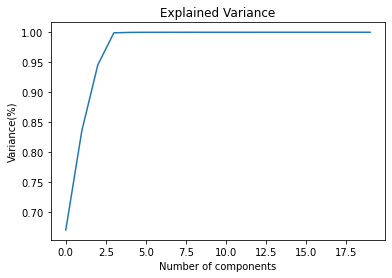

________________________________
1. KNeighborsClassifier()
________________________________
{}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.88      0.92      0.90        92
           2       0.89      0.87      0.88       101
           3       0.97      0.92      0.95       104

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.93      0.93       400

KNeighborsClassifier 0.925 0.925 0.9241093883766298
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{}
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       103
           1       0.95      0.95      0.95        92


In [349]:
pca = PCA()
principalComp = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()
n_components=4
pca = PCA(n_components=n_components)
new_data = pca.fit_transform(df)
df7 = pd.DataFrame(new_data,columns = [f'column {i}' for i in range(n_components)])
df7
X_train, X_test, y_train, y_test = train_test_split(df7,df2,random_state=5,shuffle=True,test_size=0.2)
Classification(X_train, X_test, y_train, y_test,data,'PCA_raw')

PCA on df6 (After VIF and feature Engineering)

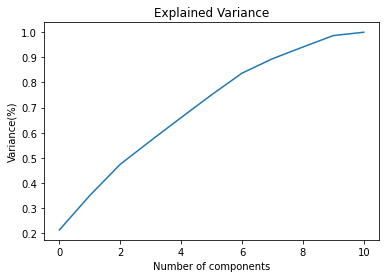

________________________________
1. KNeighborsClassifier()
________________________________
{}
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       103
           1       0.56      0.70      0.62        92
           2       0.60      0.58      0.59       101
           3       0.85      0.74      0.79       104

    accuracy                           0.71       400
   macro avg       0.72      0.71      0.71       400
weighted avg       0.72      0.71      0.71       400

KNeighborsClassifier 0.7075 0.7075 0.7088091890145637
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{}
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       103
           1       0.83      0.82      0.82        9

In [350]:
pca = PCA()
principalComp = pca.fit_transform(df6)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()
n_components=10
pca = PCA(n_components=n_components)
new_data = pca.fit_transform(df6)
df7 = pd.DataFrame(new_data,columns = [f'column {i}' for i in range(n_components)])
df7
X_train_ecvp, X_test_ecvp, y_train_ecvp, y_test_ecvp = train_test_split(df7,df2,random_state=5,shuffle=True,test_size=0.2)
Classification(X_train_ecvp, X_test_ecvp, y_train_ecvp, y_test_ecvp.values.ravel(),data,'PCA_e+c+v')

In [354]:
from sklearn.feature_selection import (RFE, SelectKBest, 
                                       SelectPercentile,RFECV)

In [355]:
X_traine, X_teste, y_traine, y_teste = train_test_split(df4,df2,random_state=5,shuffle=True,test_size=0.2)

In [356]:
rfe = RFE(GradientBoostingClassifier(random_state=42), 
          n_features_to_select=10)
rfe.fit(X_traince, y_traince)
rfe_features = X_traince.columns[rfe.support_]
dfr = df4[rfe_features]
print(f"===== {len(rfe_features)} features were selected =====")
print(f"{', '.join(rfe_features)}")
X_train_er, X_test_er, y_train_er, y_test_er = train_test_split(dfr,df2,random_state=5,shuffle=True,test_size=0.2)

Classification(X_train_er, X_test_er, y_train_er.values.ravel(), y_test_er.values.ravel(),data,'RFE_e')

===== 10 features were selected =====
battery_power, mobile_wt, px_height, px_width, ram, px_diag, px_area, talk_per_mAh, ram_per_core, weight_by_thickness
________________________________
1. KNeighborsClassifier()
________________________________
{}
              precision    recall  f1-score   support

           0       0.43      0.50      0.47       103
           1       0.24      0.33      0.28        92
           2       0.30      0.28      0.29       101
           3       0.30      0.17      0.22       104

    accuracy                           0.32       400
   macro avg       0.32      0.32      0.31       400
weighted avg       0.32      0.32      0.31       400

KNeighborsClassifier 0.32 0.32 0.3121096706997252
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{}
         

RFECV

In [359]:
rfecv = RFECV(GradientBoostingClassifier(random_state=42), 
          min_features_to_select=10,cv=10,n_jobs=-1)
rfecv.fit(X_traince, y_traince.values.ravel())
rfecv_features = X_traince.columns[rfe.support_]
dfrv = df4[rfecv_features]
print(f"===== {len(rfecv_features)} features were selected =====")
print(f"{', '.join(rfecv_features)}")
X_train_er, X_test_er, y_train_er, y_test_er = train_test_split(dfrv,df2,random_state=5,shuffle=True,test_size=0.2)

Classification(X_train_er, X_test_er, y_train_er.values.ravel(), y_test_er.values.ravel(),data,'RFECV_e')

===== 10 features were selected =====
battery_power, mobile_wt, px_height, px_width, ram, px_diag, px_area, talk_per_mAh, ram_per_core, weight_by_thickness
________________________________
1. KNeighborsClassifier()
________________________________
{}
              precision    recall  f1-score   support

           0       0.43      0.50      0.47       103
           1       0.24      0.33      0.28        92
           2       0.30      0.28      0.29       101
           3       0.30      0.17      0.22       104

    accuracy                           0.32       400
   macro avg       0.32      0.32      0.31       400
weighted avg       0.32      0.32      0.31       400

KNeighborsClassifier 0.32 0.32 0.3121096706997252
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
________________________________
2. LogisticRegression()
________________________________
{}
         

SelectKbest

In [361]:
kbest = SelectKBest(k=10)
kbest.fit(X_traince, y_traince.values.ravel())
# See selected features
kbest_features = X_traince.columns[kbest.get_support()]
dfk = df4[kbest_features]
print(f"===== {len(kbest_features)} features were selected =====")
print(f"{', '.join(kbest_features)}")
X_train_ek, X_test_ek, y_train_ek, y_test_ek = train_test_split(dfk,df2,random_state=5,shuffle=True,test_size=0.2)

Classification(X_train_ek, X_test_ek, y_train_ek.values.ravel(), y_test_ek.values.ravel(),data,'KBest_e')

In [364]:
# pd.DataFrame(data)